In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/devil/Downloads/ml_nodel/day.csv')

In [128]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [129]:
#chehck for null values(preprocessing)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [130]:
dataset['season']=dataset['season'].replace(to_replace=1,value='spring')
dataset['season']=dataset['season'].replace(to_replace=2,value='summer')
dataset['season']=dataset['season'].replace(to_replace=3,value='fall')
dataset['season']=dataset['season'].replace(to_replace=4,value='winter')

dataset['mnth']=dataset['mnth'].replace(to_replace=1,value='jan')
dataset['mnth']=dataset['mnth'].replace(to_replace=2,value='feb')
dataset['mnth']=dataset['mnth'].replace(to_replace=3,value='mar')
dataset['mnth']=dataset['mnth'].replace(to_replace=4,value='apr')
dataset['mnth']=dataset['mnth'].replace(to_replace=5,value='may')
dataset['mnth']=dataset['mnth'].replace(to_replace=6,value='jun')
dataset['mnth']=dataset['mnth'].replace(to_replace=7,value='jul')
dataset['mnth']=dataset['mnth'].replace(to_replace=8,value='aug')
dataset['mnth']=dataset['mnth'].replace(to_replace=9,value='sep')
dataset['mnth']=dataset['mnth'].replace(to_replace=10,value='oct')
dataset['mnth']=dataset['mnth'].replace(to_replace=11,value='nov')
dataset['mnth']=dataset['mnth'].replace(to_replace=12,value='dec')

dataset['weathersit']=dataset['weathersit'].replace(to_replace=1,value='Clear, Few clouds, Partly cloudy, Partly cloudy') 
dataset['weathersit']=dataset['weathersit'].replace(to_replace=2,value='Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist') 
dataset['weathersit']=dataset['weathersit'].replace(to_replace=3,value='Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds') 
dataset['weathersit']=dataset['weathersit'].replace(to_replace=4,value='Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')

dataset['weekday']=dataset['weekday'].replace(to_replace=0,value='mon')
dataset['weekday']=dataset['weekday'].replace(to_replace=1,value='tue')
dataset['weekday']=dataset['weekday'].replace(to_replace=2,value='wed')
dataset['weekday']=dataset['weekday'].replace(to_replace=3,value='thr')
dataset['weekday']=dataset['weekday'].replace(to_replace=4,value='fri')
dataset['weekday']=dataset['weekday'].replace(to_replace=5,value='sat')
dataset['weekday']=dataset['weekday'].replace(to_replace=6,value='sun')

dataset['yr']=dataset['yr'].replace(to_replace=0,value='2018')
dataset['yr']=dataset['yr'].replace(to_replace=1,value='2019')

In [131]:
# Creating the dummy variables for the variables month,season,weathersit,weekday and storing them 
# in new variable 'months',seasons','weather' and 'weekdays' respectively and 
# dropping the first column from these variables using 'drop_first = True'
months= pd.get_dummies(dataset['mnth'],drop_first=True,prefix='mnth')
seasons = pd.get_dummies(dataset['season'],drop_first=True,prefix='season')
weather= pd.get_dummies(dataset['weathersit'],drop_first=True,prefix='weather')
weekdays= pd.get_dummies(dataset['weekday'],drop_first=True,prefix='day')
years= pd.get_dummies(dataset['yr'],drop_first=True,prefix='yr')

# Add the above created dummy variables to the original bikes dataframe
dataset = pd.concat([months,seasons,weather,weekdays,years,dataset], axis = 1)

In [132]:
# Looking at the top rows of our dataframe.
dataset.head()

,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,...,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,0,1,0,0,0,0,0,0,...,sun,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,1,0,0,0,0,0,0,...,mon,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,0,1,0,0,0,0,0,0,...,tue,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,0,1,0,0,0,0,0,0,...,wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,0,1,0,0,0,0,0,0,...,thr,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [133]:
dataset.drop(['season','weathersit','weekday','mnth','yr','casual','registered','instant','dteday'],axis=1,inplace=True)

In [145]:
dataset.columns

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_spring', 'season_summer', 'season_winter',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [137]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values  #count


In [138]:
print(X)
print(y)

[[ 0.        0.        0.       ... 18.18125  80.5833   10.749882]
 [ 0.        0.        0.       ... 17.68695  69.6087   16.652113]
 [ 0.        0.        0.       ...  9.47025  43.7273   16.636703]
 ...
 [ 0.        1.        0.       ... 12.12     75.2917    8.333661]
 [ 0.        1.        0.       ... 11.585    48.3333   23.500518]
 [ 0.        1.        0.       ... 11.17435  57.75     10.374682]]
[ 985  801 1349 1562 1600 1606 1510  959  822 1321 1263 1162 1406 1421
 1248 1204 1000  683 1650 1927 1543  981  986 1416 1985  506  431 1167
 1098 1096 1501 1360 1526 1550 1708 1005 1623 1712 1530 1605 1538 1746
 1472 1589 1913 1815 2115 2475 2927 1635 1812 1107 1450 1917 1807 1461
 1969 2402 1446 1851 2134 1685 1944 2077  605 1872 2133 1891  623 1977
 2132 2417 2046 2056 2192 2744 3239 3117 2471 2077 2703 2121 1865 2210
 2496 1693 2028 2425 1536 1685 2227 2252 3249 3115 1795 2808 3141 1471
 2455 2895 3348 2034 2162 3267 3126  795 3744 3429 3204 3944 4189 1683
 4036 4191 4073 4400 387

In [139]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [140]:
#making LR model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [141]:
#prediction
y_pred=lin_reg.predict(X_test)


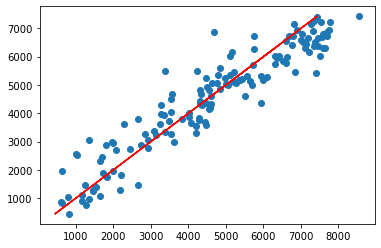

In [142]:
#visualizing results
plt.scatter(y_test, y_pred)
plt.plot(y_pred,y_pred,color='red')
plt.show()

In [143]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(r2)


0.8788843187567623


In [146]:
#addid const var
import statsmodels.api as sm  
X_train_lm = sm.add_constant(pd.DataFrame(X_train,columns=['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_spring', 'season_summer', 'season_winter',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']))

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     102.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.53e-198
Time:                        22:33:41   Log-Likelihood:                -4704.0
No. Observations:                 584   AIC:                             9466.
Df Residuals:                     555   BIC:                             9593.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================================
                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                            2478.8933    316.580      7.830      0.000    1857.053    3100.734
mnth_aug                                                                                         -115.9342    276.945     -0.419      0.676    -659.922     428.054
mnth_dec                                                                                         -448.7059    280.884     -1.597      0.111   -1000.432     103.020
mnth_feb                                                                                         -279.5146    271.520     -1.029      0.304    -812.848     253.819
mnth_jan                                                                                         -402.7881    280.196     -1.438      0.151    -953.162     147.586
mnth_jul                                                                                         -608.1578    285.888     -2.127      0.034   -1169.713     -46.602
mnth_jun                                                                                         -103.1963    202.959     -0.508      0.611    -501.857     295.465
mnth_mar                                                                                          117.8580    206.342      0.571      0.568    -287.448     523.164
mnth_may                                                                                          247.6474    168.186      1.472      0.141     -82.711     578.006
mnth_nov                                                                                         -559.7488    304.557     -1.838      0.067   -1157.974      38.477
mnth_oct                                                                                           64.7567    296.020      0.219      0.827    -516.700     646.214
mnth_sep                                                                                          507.6661    261.331      1.943      0.053      -5.652    1020.985
season_spring                                                                                    -834.9491    251.317     -3.322      0.001   -1328.598    -341.300
season_summer                                                                                      24.5276    208.369      0.118      0.906    -384.760     433.815
season_winter                                                                                     646.4794    246.140      2.626      0.009     163.000    1129.959
weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1737.4497    250.978     -6.923   

In [147]:
#calculate vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = pd.DataFrame(X_train,columns=['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_spring', 'season_summer', 'season_winter',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'])

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features     VIF
24                                         workingday  104.67
25                                               temp   72.35
26                                              atemp   62.49
18                                            day_sun   21.81
16                                            day_mon   20.96
11                                      season_spring   10.95
13                                      season_winter   10.86
12                                      season_summer    7.99
8                                            mnth_nov    6.94
9                                            mnth_oct    6.91
1                                            mnth_dec    6.01
0                                            mnth_aug    5.74
4                                            mnth_jul    5.67
3                                            mnth_jan    5.66
23                                            holiday    5.32
2       

In [148]:
dataset = dataset.drop(['season_spring'],axis=1)

In [153]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values #count

print(dataset.shape)
print(X.shape)

(730, 29)
(730, 28)


In [154]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#making LR model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

#prediction
y_pred=lin_reg.predict(X_test)


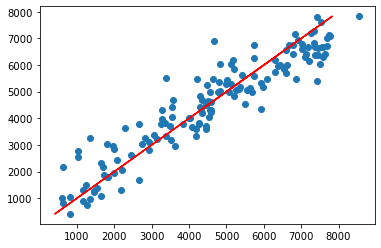

r^2=0.8755618940837475


In [155]:
#visualizing
plt.scatter(y_test, y_pred)
plt.plot(y_pred,y_pred,color='red')
plt.show()

#calculatin r2
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(f'r^2={r2}')


In [156]:
dataset.columns

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_summer', 'season_winter',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [158]:
#addid const var
import statsmodels.api as sm  
X_train_lm = sm.add_constant(pd.DataFrame(X_train,columns=['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_summer', 'season_winter',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']))

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.35e-197
Time:                        22:38:30   Log-Likelihood:                -4709.8
No. Observations:                 584   AIC:                             9476.
Df Residuals:                     556   BIC:                             9598.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================================
                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                            2078.0063    295.311      7.037      0.000    1497.944    2658.069
mnth_aug                                                                                          267.9520    253.950      1.055      0.292    -230.867     766.771
mnth_dec                                                                                         -614.0432    278.924     -2.201      0.028   -1161.918     -66.169
mnth_feb                                                                                         -650.6623    249.698     -2.606      0.009   -1141.128    -160.196
mnth_jan                                                                                         -762.0905    260.806     -2.922      0.004   -1274.376    -249.805
mnth_jul                                                                                         -235.5303    265.331     -0.888      0.375    -756.705     285.644
mnth_jun                                                                                            9.4748    201.903      0.047      0.963    -387.112     406.061
mnth_mar                                                                                         -123.4244    194.874     -0.633      0.527    -506.204     259.355
mnth_may                                                                                          221.3973    169.510      1.306      0.192    -111.560     554.355
mnth_nov                                                                                         -633.0216    306.487     -2.065      0.039   -1235.036     -31.008
mnth_oct                                                                                          -32.7649    297.208     -0.110      0.912    -616.553     551.023
mnth_sep                                                                                          803.9520    247.851      3.244      0.001     317.114    1290.790
season_summer                                                                                     456.6382    164.254      2.780      0.006     134.004     779.272
season_winter                                                                                    1167.6001    191.392      6.101      0.000     791.661    1543.539
weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1703.6423    253.025     -6.733      0.000   -2200.644   -1206.641
weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -409.8490     90.255     -4.541   

In [160]:
#calculate vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = pd.DataFrame(X_train,columns=['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_summer', 'season_winter',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'])

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features    VIF
23                                         workingday  90.21
24                                               temp  72.27
25                                              atemp  62.49
17                                            day_sun  18.67
15                                            day_mon  17.83
8                                            mnth_nov   6.91
9                                            mnth_oct   6.84
12                                      season_winter   6.45
1                                            mnth_dec   5.82
11                                      season_summer   4.88
3                                            mnth_jan   4.82
4                                            mnth_jul   4.80
0                                            mnth_aug   4.74
22                                            holiday   4.72
2                                            mnth_feb   3.91
10                      

In [161]:
dataset = dataset.drop(['season_winter'],axis=1)

In [162]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values  #count

print(dataset.shape)
print(X.shape)

(730, 28)
(730, 27)


In [163]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#making LR model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

#prediction
y_pred=lin_reg.predict(X_test)


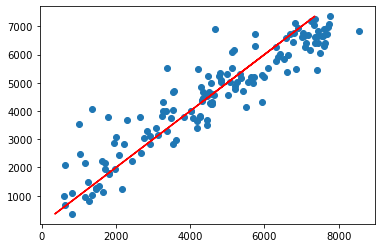

r^2=0.8545560930697588


In [164]:
#visualizing
plt.scatter(y_test, y_pred)
plt.plot(y_pred,y_pred,color='red')
plt.show()

#calculatin r2
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(f'r^2={r2}')

In [165]:
dataset.columns

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_summer',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [166]:
#addid const var
import statsmodels.api as sm  
X_train_lm = sm.add_constant(pd.DataFrame(X_train,columns=['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_summer',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']))

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     99.67
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.87e-190
Time:                        22:39:40   Log-Likelihood:                -4728.7
No. Observations:                 584   AIC:                             9511.
Df Residuals:                     557   BIC:                             9629.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================================
                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                            2048.2031    304.719      6.722      0.000    1449.664    2646.743
mnth_aug                                                                                          216.0904    261.929      0.825      0.410    -298.399     730.580
mnth_dec                                                                                          178.1317    254.754      0.699      0.485    -322.264     678.527
mnth_feb                                                                                         -642.9697    257.684     -2.495      0.013   -1149.122    -136.818
mnth_jan                                                                                         -745.4442    269.137     -2.770      0.006   -1274.091    -216.797
mnth_jul                                                                                         -290.7814    273.662     -1.063      0.288    -828.317     246.755
mnth_jun                                                                                          -30.3404    208.255     -0.146      0.884    -439.402     378.721
mnth_mar                                                                                         -124.1035    201.110     -0.617      0.537    -519.130     270.923
mnth_may                                                                                          186.0530    174.832      1.064      0.288    -157.357     529.463
mnth_nov                                                                                          532.8246    247.279      2.155      0.032      47.112    1018.537
mnth_oct                                                                                         1106.1738    238.654      4.635      0.000     637.403    1574.945
mnth_sep                                                                                          986.8835    253.903      3.887      0.000     488.160    1485.607
season_summer                                                                                     451.1012    169.507      2.661      0.008     118.150     784.053
weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1740.1730    261.048     -6.666      0.000   -2252.932   -1227.414
weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -394.1029     93.105     -4.233      0.000    -576.983    -211.223
day_mon                                                                                           372.2606    118.086      3.152   

In [167]:
#calculate vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = pd.DataFrame(X_train,columns=['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_summer',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'])

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features    VIF
22                                         workingday  90.20
23                                               temp  72.27
24                                              atemp  62.48
16                                            day_sun  18.67
14                                            day_mon  17.83
11                                      season_summer   4.88
3                                            mnth_jan   4.82
4                                            mnth_jul   4.79
0                                            mnth_aug   4.74
21                                            holiday   4.71
1                                            mnth_dec   4.56
8                                            mnth_nov   4.22
9                                            mnth_oct   4.14
2                                            mnth_feb   3.91
10                                           mnth_sep   3.71
5                       

In [168]:
dataset = dataset.drop(['workingday'],axis=1)

In [169]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values  #count

In [170]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [171]:
#making LR model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

#prediction
y_pred=lin_reg.predict(X_test)

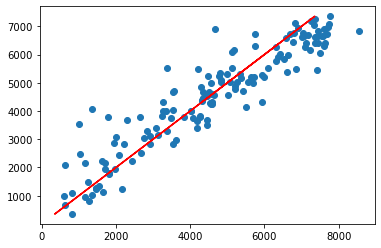

r^2=0.8545560930697587


In [172]:
#visualizing
plt.scatter(y_test, y_pred)
plt.plot(y_pred,y_pred,color='red')
plt.show()

#calculatin r2
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(f'r^2={r2}')

In [173]:
dataset.columns

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_summer',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [174]:
#addid const var
import statsmodels.api as sm  
X_train_lm = sm.add_constant(pd.DataFrame(X_train,columns=['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_summer',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'temp', 'atemp', 'hum', 'windspeed']))

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     99.67
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.87e-190
Time:                        22:42:51   Log-Likelihood:                -4728.7
No. Observations:                 584   AIC:                             9511.
Df Residuals:                     557   BIC:                             9629.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================================
                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                            2758.5715    385.506      7.156      0.000    2001.347    3515.796
mnth_aug                                                                                          216.0904    261.929      0.825      0.410    -298.399     730.580
mnth_dec                                                                                          178.1317    254.754      0.699      0.485    -322.264     678.527
mnth_feb                                                                                         -642.9697    257.684     -2.495      0.013   -1149.122    -136.818
mnth_jan                                                                                         -745.4442    269.137     -2.770      0.006   -1274.091    -216.797
mnth_jul                                                                                         -290.7814    273.662     -1.063      0.288    -828.317     246.755
mnth_jun                                                                                          -30.3404    208.255     -0.146      0.884    -439.402     378.721
mnth_mar                                                                                         -124.1035    201.110     -0.617      0.537    -519.130     270.923
mnth_may                                                                                          186.0530    174.832      1.064      0.288    -157.357     529.463
mnth_nov                                                                                          532.8246    247.279      2.155      0.032      47.112    1018.537
mnth_oct                                                                                         1106.1738    238.654      4.635      0.000     637.403    1574.945
mnth_sep                                                                                          986.8835    253.903      3.887      0.000     488.160    1485.607
season_summer                                                                                     451.1012    169.507      2.661      0.008     118.150     784.053
weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -1740.1730    261.048     -6.666      0.000   -2252.932   -1227.414
weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -394.1029     93.105     -4.233      0.000    -576.983    -211.223
day_mon                                                                                          -338.1078    129.516     -2.611   

In [175]:
#calculate vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = pd.DataFrame(X_train,columns=['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'season_summer',
       'weather_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weather_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'day_mon', 'day_sat', 'day_sun', 'day_thr', 'day_tue', 'day_wed',
       'yr_2019', 'holiday', 'temp', 'atemp', 'hum', 'windspeed'])

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features     VIF
22                                               temp  589.51
23                                              atemp  568.59
24                                                hum   41.04
25                                          windspeed    7.04
11                                      season_summer    5.25
4                                            mnth_jul    4.99
0                                            mnth_aug    4.86
10                                           mnth_sep    3.64
9                                            mnth_oct    3.60
5                                            mnth_jun    3.17
1                                            mnth_dec    3.13
8                                            mnth_nov    3.05
3                                            mnth_jan    2.92
2                                            mnth_feb    2.55
13  weather_Mist + Cloudy, Mist + Broken clouds, M...    2.48
7       